# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [101]:
# !pip install palmerpenguins

In [102]:
from palmerpenguins import load_penguins

In [103]:
import pandas as pd
import numpy as np

In [104]:
df = load_penguins()
df = df.dropna().copy()

In [105]:
df['year'] = df['year'].astype("category")

In [106]:
dummies = pd.get_dummies(df[['species', 'island', 'sex', 'year']], drop_first=True) * 1
df = pd.concat([df, dummies], axis = 1)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [107]:
# !pip install scikit-learn

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [109]:
# I split the data prior to running any regressions
X_train, X_test, y_train, y_test = train_test_split(df.drop(['bill_depth_mm'], axis=1), df['bill_depth_mm'], shuffle=True, random_state=321, test_size = .25)

In [110]:
models = {
    "Model_1": ['bill_length_mm'],
    "Model_2": ['bill_length_mm', 'flipper_length_mm'],
    "Model_3": ['bill_length_mm', 'flipper_length_mm', 'body_mass_g'],
    "Model_4": ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'sex_male']
}

In [111]:
scale = pd.DataFrame()
scale['bill_length_mm'] = np.linspace(min(df['bill_length_mm']), max(df['bill_length_mm']), 1000)
scale['flipper_length_mm'] = np.linspace(min(df['flipper_length_mm']), max(df['flipper_length_mm']), 1000)
scale['body_mass_g'] = np.linspace(min(df['body_mass_g']), max(df['body_mass_g']), 1000)

scale_female = scale.copy()
scale_female['sex_male'] = 0
scale_male = scale.copy()
scale_male['sex_male'] = 1

In [112]:
#| warning: false
#| message: false

rows = []
predictions_male = pd.DataFrame()
predictions_female = pd.DataFrame()
for name, Xcols in models.items():
    X_train_loop = X_train[Xcols]
    model = LinearRegression().fit(X_train_loop, y_train)
    y_train_ = model.predict(X_train_loop[Xcols])
    X_train_loop[f"{name}_predict"] = y_train_
    y_test_ = model.predict(X_test[Xcols])
    test_mse = mean_squared_error(y_test, y_test_)
    test_rmse = test_mse ** .5
    test_r2 = r2_score(y_test, y_test_)
    train_mse = mean_squared_error(y_train, y_train_)
    train_rmse = train_mse ** .5
    train_r2 = r2_score(y_train, y_train_)
    predictions_male[name] = pd.Series(
        model.predict(scale_male[Xcols]),
        index=scale_male['bill_length_mm']
    )
    predictions_female[name] = pd.Series(
        model.predict(scale_female[Xcols]),
        index=scale_female['bill_length_mm']
    )
    rows.append({"Model": name, 
                 "Train MSE": train_mse, 
                 "Train RMSE": train_rmse,
                 "Train R2": train_r2,
                 "Test MSE": test_mse, 
                 "Test RMSE": test_rmse,
                 "Test R2": test_r2})

<positron-console-cell-112>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-112>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-112>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-112>:11: SettingW

In [113]:
pd.DataFrame(rows)

,Model,Train MSE,Train RMSE,Train R2,Test MSE,Test RMSE,Test R2
0,Model_1,3.626628,1.904371,0.060812,3.785294,1.945583,0.023740
1,Model_2,2.455883,1.567126,0.364000,2.350489,1.533130,0.393789
2,Model_3,2.431133,1.559209,0.370410,2.390958,1.546272,0.383351
3,Model_4,1.398748,1.182687,0.637766,1.116119,1.056466,0.712143


In [114]:
df_male = df[df['sex_male'] == 1]
df_female = df[df['sex_male'] == 0]

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

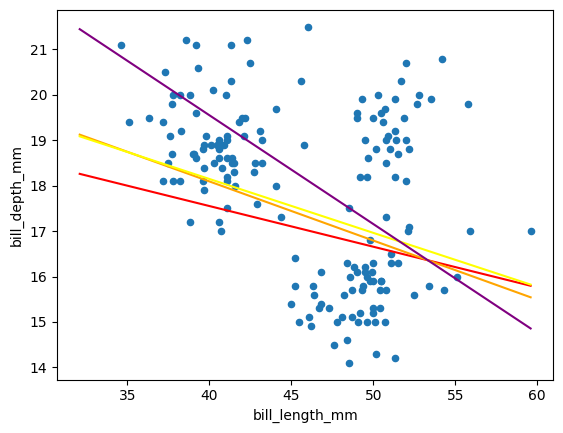

In [115]:
df_male.plot.scatter(x='bill_length_mm', y='bill_depth_mm')
predictions_male['Model_1'].plot.line(c = "red")
predictions_male['Model_2'].plot.line(c = "orange")
predictions_male['Model_3'].plot.line(c = "yellow")
predictions_male['Model_4'].plot.line(c = "purple")

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

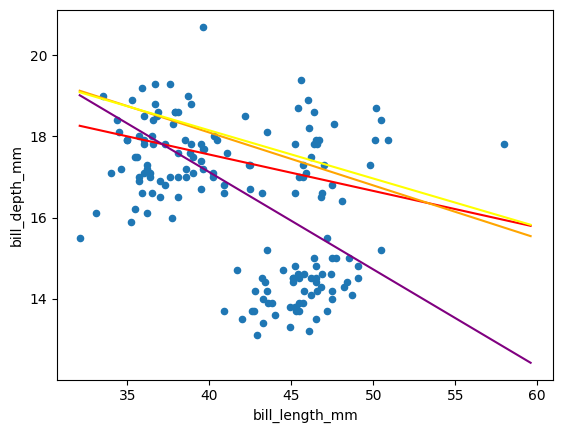

In [116]:
df_female.plot.scatter(x='bill_length_mm', y='bill_depth_mm')
predictions_female['Model_1'].plot.line(c = "red")
predictions_female['Model_2'].plot.line(c = "orange")
predictions_female['Model_3'].plot.line(c = "yellow")
predictions_female['Model_4'].plot.line(c = "purple")

In [117]:
df_error = pd.DataFrame(rows)
df_error_long = df_error[["Model", "Train RMSE", "Test RMSE"]].melt(id_vars=["Model"], value_name = "RMSE", var_name = "type")
df_error_long

,Model,type,RMSE
0,Model_1,Train RMSE,1.904371
1,Model_2,Train RMSE,1.567126
2,Model_3,Train RMSE,1.559209
3,Model_4,Train RMSE,1.182687
4,Model_1,Test RMSE,1.945583
5,Model_2,Test RMSE,1.533130
6,Model_3,Test RMSE,1.546272
7,Model_4,Test RMSE,1.056466


In [118]:
# !pip install plotnine
from plotnine import ggplot, aes, geom_point

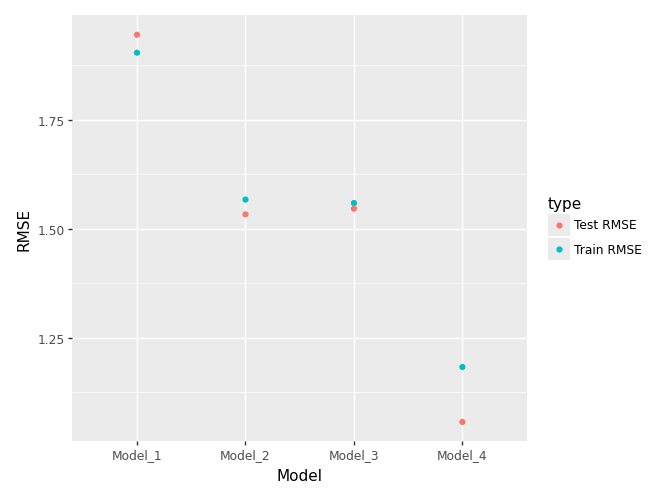

In [119]:
(ggplot(df_error_long,
        aes(x = "Model",
            y = "RMSE",
            color = "type")) +
 geom_point())

I don't really know what flexibilty measure to use, so I settled on comparing the RMSE of the models using the above visual.